# Introduction

We are curious what fraction of a library is filled with spikes?

In [3]:
import os
from glob import glob
import sys
import pandas

In [66]:
%matplotlib inline

In [12]:
ROOT=os.path.expanduser("~diane/proj/encode3-curation")
if ROOT not in sys.path:
    sys.path.append(ROOT)

In [13]:
experiment_qc = pandas.read_csv(os.path.join(ROOT, 'compare-mad', 'experiment-mad-qc.csv'))

In [69]:
wold = glob(os.path.expanduser('~/public_html/compare-mad/wold_gene_quantifications/*_tpms.csv'))
len(wold)

95

In [11]:
gingeras = glob(os.path.expanduser('~/public_html/compare-mad/gingeras_fpkms/*_tpms.csv'))
len(gingeras)

142

In [57]:
def read_experiment_quantifications(experiments):
    for pathname in experiments:
        path, filename = os.path.split(pathname)
        accession = filename.split('_')[0]
        data = pandas.read_csv(pathname, index_col=0, header=0)
        trna_rows = [ x[0].isdigit() for x in data.index ]
        gencode_rows = [ x.startswith('ENS') for x in data.index]
        spike_rows = [ x.startswith('gSpikein') for x in data.index]
        trna_sum = data[trna_rows].sum()
        gencode_sum = data[gencode_rows].sum()
        spike_sum = data[spike_rows].sum()
        total_sum = data.sum()
        fraction_spikes = spike_sum / total_sum
        for v in fraction_spikes:
            yield v

In [58]:
gingeras_sums = list(read_experiment_quantifications(gingeras))

In [61]:
gs = pandas.Series(gingeras_sums)

# Gingeras Fraction Spikes

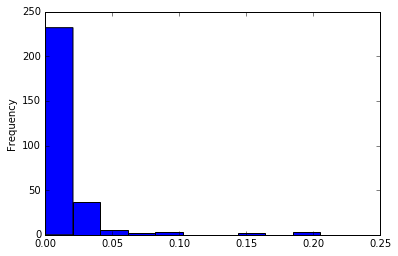

In [67]:
gs.plot(kind='hist')

There's so few Gingeras spikes > 0.05. We can look at all the values

In [71]:
gs[gs> 0.05]

44     0.200605
45     0.205193
66     0.195303
67     0.154312
110    0.059833
148    0.088123
152    0.054312
218    0.161874
219    0.086756
222    0.054840
224    0.074795
262    0.078662
263    0.099119
dtype: float64

In [70]:
wold_sums = pandas.Series(read_experiment_quantifications(wold))

# Wold Fraction Spikes

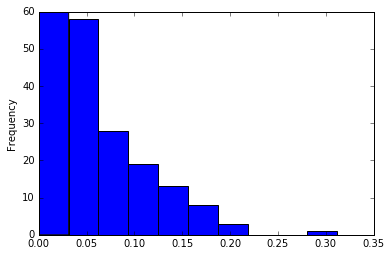

In [73]:
wold_sums.plot(kind='hist')

In [74]:
len(wold_sums)

190